## NPI Study
## Analysis built by Blake Hamm
## 23 January 2022

<br>
This jupyter notebook focuses on exploratory data analysis (EDA) and vizualizations. <b>This does not contain any statisitcal testing and no conclusive decisions can be made from the analysis.</b> However, the visuals are an interesting tool and could indicate where further research is needed.
<br>
A few comments prior to the analysis. Without having been involved with the data collection process, I am unsure the reliability of the data. Specifically, the individual recording the data should always come from an ubiased perspective; ideally, this individual should have no association with the research.

In [14]:
## Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display



## Set figure size
sns.set(rc={'figure.figsize':(11.7,8.27)})



## Load data
sheets_dict = pd.read_excel(
    'data/clean_data.ods', sheet_name=None, engine='odf')

# Make tables for each sheet
for name, df in sheets_dict.items():
    exec(name + " = df")
    print('\n\n', '=== ', name, ' ===')
    display(df.head(3))



 ===  patient  ===


,id,sex,dob,group
0,118,Male,1996-09-16,Rehab
1,115,Female,1965-08-14,Combination
2,112,Female,1967-08-15,STM




 ===  vas  ===


,id,resting,active,observation,observation_dummy
0,112,4.0,6.5,pre,0
1,112,1.0,2.0,post,1
2,115,1.5,8.0,pre,0




 ===  balance  ===


,id,standard,proprioception,vision,vestibular,front_left,front_right,back_left,back_right,observation,observation_dummy
0,112,14,24,32,78,135,160,67,37,pre,0
1,112,15,38,34,86,128,132,37,37,post,1
2,115,21,18,26,69,120,98,34,30,pre,0




 ===  strength  ===


,id,type,trial_1,trial_2,observation,observation_dummy
0,112,Quad Extension,36.4,34.6,pre,0
1,112,Hamstring Flexion,30.1,30.2,pre,0
2,112,Quad Extension,17.4,17.3,post,1




 ===  rangeofmotion  ===


,id,type,trial_1,trial_2,observation,observation_dummy
0,112,Active Hip Internal,40.5,40.3,pre,0
1,112,Passive Hip Internal,30.7,36.4,pre,0
2,112,Active Hip External,37.8,42.8,pre,0


The above shows the raw data collected. This was constructed by digesting word documents into a workable data format. This was done manually and the data is available in the <i>clean_data.ods</i> file.

In [15]:
## Function to build EDA
def run_eda(df, cols):
    fig, axs = plt.subplots(ncols=len(cols))
    for i, col_name in enumerate(cols):
        sns.boxplot(x='observation', y=col_name, data=df, ax=axs[i])

### VAS Measurements:

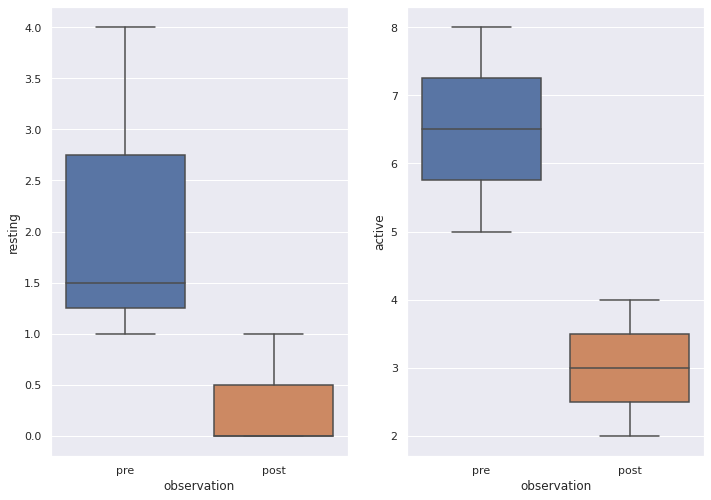

In [16]:
## Explore 'vas' data
vas_cols = ['resting','active']
run_eda(vas, vas_cols)

The above gives a boxplot comparing the VAS metrics for resting and active before and after the treatment was conducted. Visually, it appears that on average the post treatment records show lower values for the VAS measurement. It also must be noted that in the resting boxplot, there appears to be a much higher standard deviation in the pre-treatment measurement vs the post-treatment measurement. While in the active measurement, the distributions pre and post treatment appear much more similar.
<br><br>
<b>This is not conclusive evidence indicating a significant improvement occured.</b> Moreover, it shares that this is likely a metric that's worth further exploration; specifically the active measurement.

### Balance measurements:

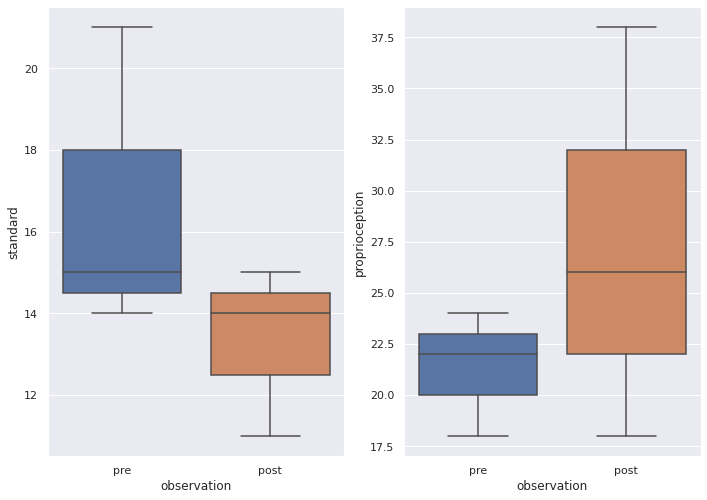

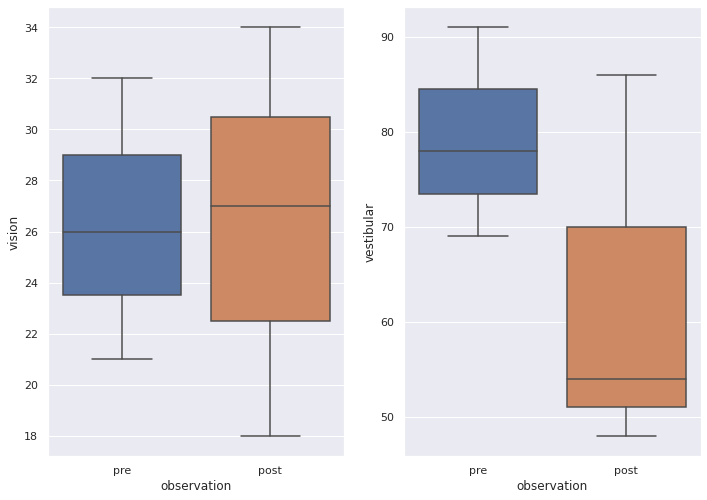

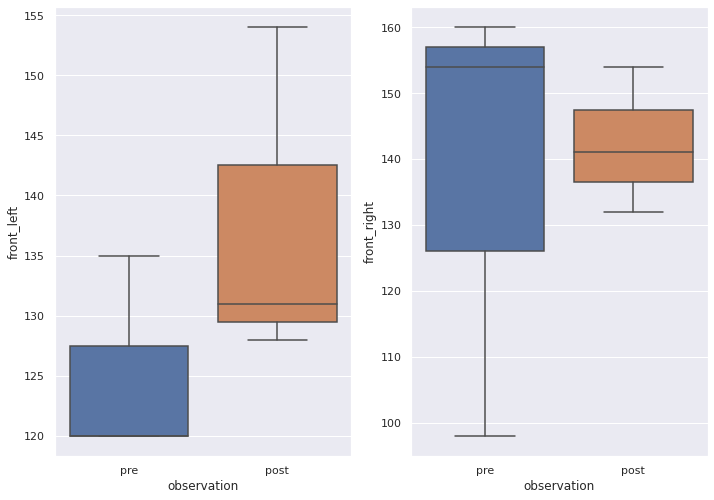

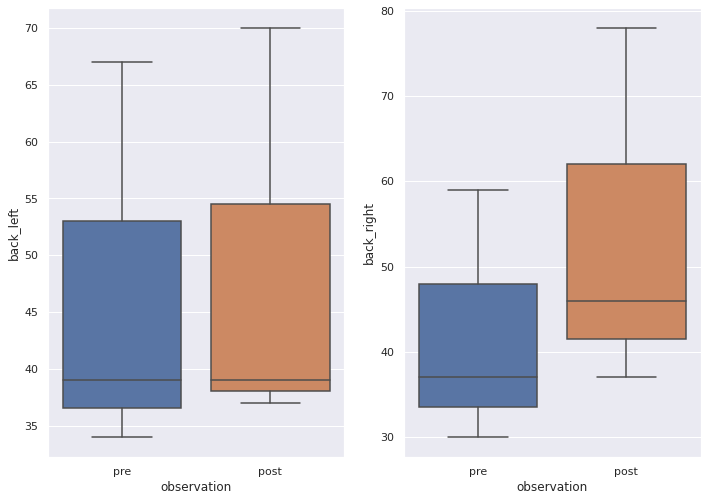

In [17]:
## Explore 'balance' data
balance_cols_a = ['standard','proprioception']
run_eda(balance, balance_cols_a)

balance_cols_b = ['vision','vestibular']
run_eda(balance, balance_cols_b)

balance_cols_c = ['front_left','front_right']
run_eda(balance, balance_cols_c)

balance_cols_d = ['back_left','back_right']
run_eda(balance, balance_cols_d)

The above gives boxplots for the various 'balance' measurements before and after the treatment was conducted. There are many observations that can be taken from this dataset. Here is a breakdown of each metric and the observations I notice:
<br>
<ul>
    <li>Standard - We notice this observation has a slightly lower median post treatment. Both pre and post treatment appear to have a skewed normal distribution tending to their median (negatively skewed for the pre treatment and positively skewed for the post treatment).</li>
    <li>Proprioception - We notice this observation has a slightly higher median post treatment. This measurement has a much higher standard deviation in the post treatment dataset.</li>
    <li>Vision - This measurement has very similar distribution in the data pre and post operation. The only note is the larger standard deviation post treatment.</li>
    <li>Vestibular - The median post treatment is much lower than the median pre treatment. However, the distribution of the data has changed significntly moving from a normal distribution pre treatment to a negatively skewed normal distribution post treatment. This metric could be interesting to explore further.</li>
    <li>Front left/right - The front left and front right balance measurements have extremely different behavior. Likely these metric would be more valuable with data indicating what side of the body the patient is receceiving treatment for.</li>
    <li>Back left/right - Again, I would render these metric useless without knowing the patients injury side. However, it is interesting to note that the pre and post observation data is very similar on the back left measurement. It appears no change has occured to this measurement from the treatment.</li>
</ul>
<b>This is not conclusive evidence indicating a significant improvement occured.</b>

### Strength Measurement:

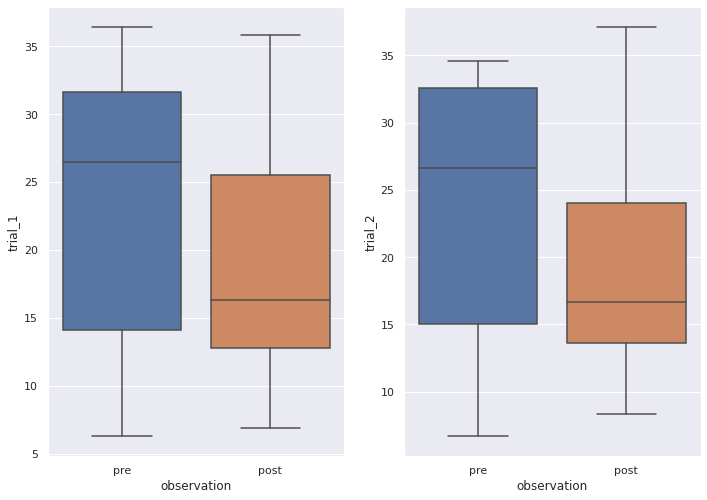

In [18]:
## Explore 'strength' data
strength_cols = ['trial_1', 'trial_2']
run_eda(strength, strength_cols)

The strength measurement in trial one has a slightly lower median in the post observation. However, the distribution is very similar in both pre and post treatment datasets and there appears to be very little change. The strength measurement in trial two has much different behavior. The median is lower post observation, but more importantly, the interquartile range appears to be much smaller post treatment. There is likely a more uniform distribution of the data with a few significant outliers post operation.
<br><br>
<b>This is not conclusive evidence indicating a significant improvement occured.</b>

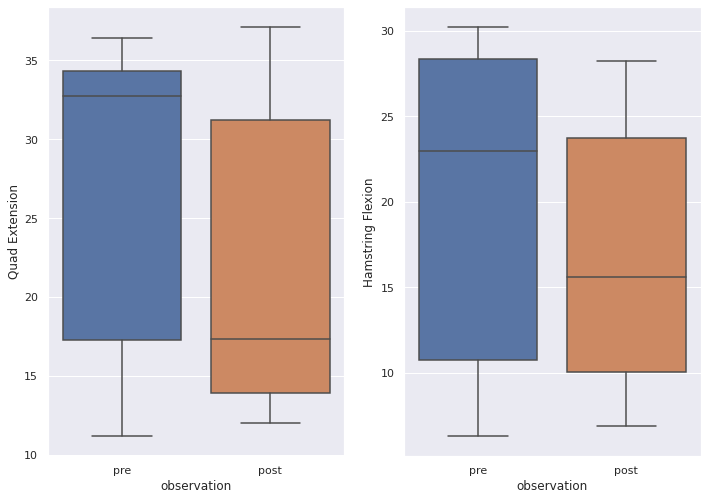

In [21]:
## Explore 'strength' data

# Clean data (trial columns)
strength_clean = strength.melt(
    id_vars=['id', 'type','observation','observation_dummy'], 
    var_name='trial', 
    value_name='vals')

# Get type
types = list(strength_clean.type.unique())
strength_clean = strength_clean.pivot(
    index=['id','trial','observation','observation_dummy'],
    columns='type', values='vals').reset_index().sort_values('observation', ascending=False)

# Build visualz
run_eda(strength_clean, types)

The strength measurement for both the quad extension and the hamstring flexion have a lower median in the post treatment dataset. However, the interquartile range pre and post treatment are very similar. While the median has changed, I suspect statistical tests would fail to reject the null hypothesis and would indicate no major improvement from the treatment.
<br><br>
<b>This is not conclusive evidence indicating a significant improvement occured.</b>

### Range of Motion Measurments:

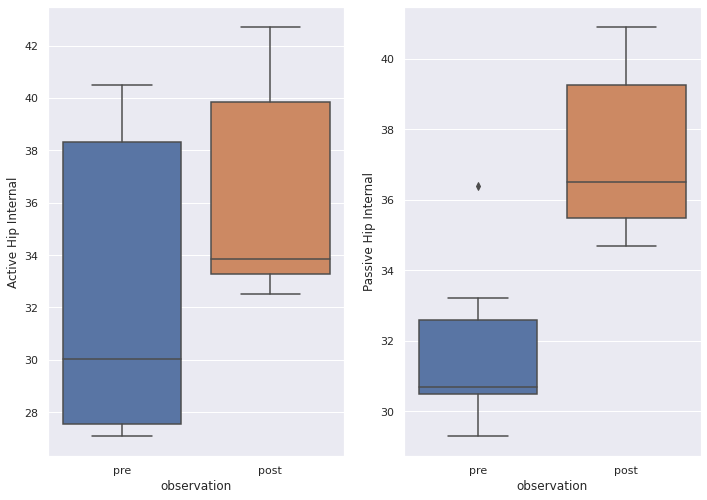

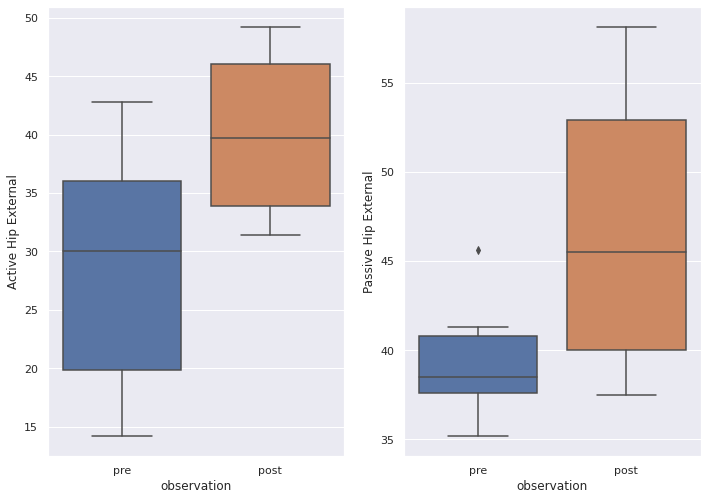

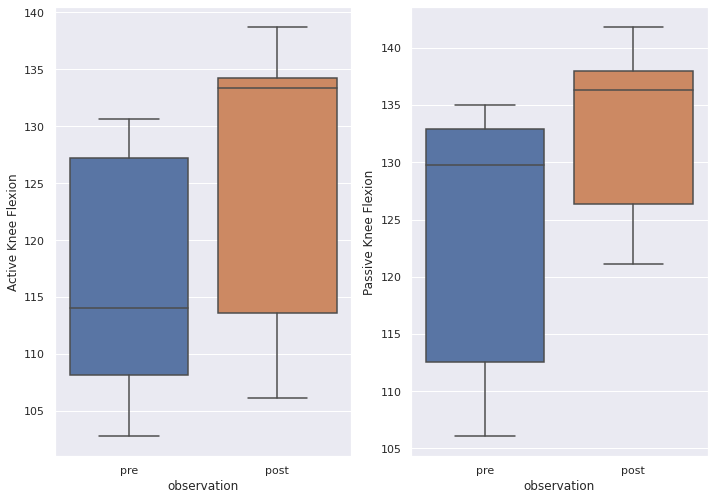

In [22]:
## Explore 'rangeofmotion' data

# Clean data (trial columns)
rangeofmotion_clean = rangeofmotion.melt(
    id_vars=['id', 'type','observation','observation_dummy'], 
    var_name='trial', 
    value_name='vals')

# Get type
types = list(rangeofmotion_clean.type.unique())
rangeofmotion_clean = rangeofmotion_clean.pivot(
    index=['id','trial','observation','observation_dummy'],
    columns='type', values='vals').reset_index().sort_values('observation', ascending=False)

# Build visualz
run_eda(rangeofmotion_clean, types[:2])
run_eda(rangeofmotion_clean, types[2:4])
run_eda(rangeofmotion_clean, types[4:])

The above gives boxplots for the various 'range of motion' measurements before and after the treatment was conducted. There are many observations that can be taken from this dataset. Here is a breakdown of each metric and the observations I notice:
<br>
<ul>
    <li>Active Hip Internal - This measurement has a higher median post treatment. Both pre and post treatment datasets indicate a negatively skewed normal distribution.</li>
    <li>Passive Hip Internal - This measurement has visually significant changes pre and post treatment. The entire interquartile range does not overlap at all and the median's are different before and after the treatment. Also, there is one major outlier in the pre treatment data. This is a metric I would definitely want to explore further.</li>
    <li>Active Hip External - This measurement has a higher median post treatment and an overall higher distribution as well. Again, this would be worth exporing further.</li>
    <li>Passive Hip External - The median post treatment is higher for this measurement. We also notice the distribution has changed significantly post treatment and has a much larger standard deviation. I would also explore the outlier observation in the pre treatment data. I suspect this correlates to the outlier in the internal version of this measurement. Likely, there is one patient that has more flexibility pre treatment. This is especially interesting becuase it indicates there could be external bias from something like a stretching session or yoga prior to the appointment.</li>
    <li>Active Knee Flexion - The median has increased over fifteen units pre and post treatment. However, the intequartile range remains very similar despite this change as the data post treatment is positively skewed.</li>
    <li>Passive Knee Flexion - The median has increased five units post operation and the distribution has also changed. It is much more uniform verses the pre treatment data which is positively skewed with a much higher standard deviation.</li>
</ul>
<b>This is not conclusive evidence indicating a significant improvement occured.</b>

## Conclusion
<b>As mentioned previously, there are no conclusions we can make from this analysis. This analysis does not indicate that an improvement from the treatment occured. Moreover, it gives us an idea of what measurements might be worth exploring further.</b>
<br><br>
There are a few data points that stand out and would be worth exploring further. Specifically, the VAS measurement and the range of motion measurments. Without having intimate knowledge of the research itself (and only the dataset), I'm unsure it is valid to only explore certain measurements. If it were, I'm especially intersted in the VAS metrics. Assuming no bias, this measurement appears to have decreased significantly post treatment. If this was a desired outcome and has significant health improvements on the patients, we could likely prove this imperically. Furthermore, the range of motion measurements also have intersting indications. Specifically, after normalizing this data, we may be able to create a larger dataset. For example, if we normalized the active/passive, external/internal and hip/knee data, we could create a much larger dataset that would allow for more reliable conclusions. Essentially, if we put all of the measurements on the same playing field (effectively comparing apples to oranges confidently), then we would have a much larger "range of motion" dataset. This could then be used to more confidently deliver a conclusion on whether the treatment had significant improvements on range of motion.
<br><br>
Overall, I suspect bias in this dataset. Both from the observer recording the data as well as external bias from the patients themselves (indicated by the outler in the passive hip range of motion tests). Finally, the largest bias occurs from the small sample size. Because the sample size was so small, we notice the distribution of the data is highly volatile. It would be hard to test if improvements were made from the treatment due to this bias. Even if statistical testing was implemented and the null was rejected, we would need a thorough sample size analysis to decide if statistical tests are valid.